<a href="https://colab.research.google.com/github/priyanshi1309/Foot_Ulcer_Classification/blob/main/Proposed_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROPOSED METHODOLOGY

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DFU'

Mounted at /content/drive
/content/drive/MyDrive/DFU


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 40.8 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, InceptionResNetV2
from tensorflow.keras.layers import concatenate, Flatten, Dense, Input
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import metrics
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Load Dataset

In [ ]:
# Define Constants
TRAIN_PATH = '/content/drive/MyDrive/DFU/Patches'
TEST_PATH = '/content/drive/MyDrive/DFU/Test/'

BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
NUM_CLASSES = 2
EPOCHS = 10

In [ ]:
# Define data augmentation parameters
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train_generator = data_augmentation.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = data_augmentation.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 845 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [ ]:

test_generator = ImageDataGenerator().flow_from_directory(
    TEST_PATH,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 179 images belonging to 1 classes.


# Proposed Model

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

# Create an input layer
input_layer = Input(shape=input_shape)

# Load the pre-trained models without the top classification layers
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_layer)
inception = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)

# Freeze the weights of the pre-trained models
effnet.trainable = True
inception.trainable = True

# Get the output tensors of the pre-trained models
effnet_output = effnet.output
inception_output = inception.output

# Flatten the output tensors
effnet_output = Flatten()(effnet_output)
inception_output = Flatten()(inception_output)

# Concatenate the flattened outputs
concatenated = concatenate([effnet_output, inception_output])

# Add a dense layer for classification
dense = Dense(128, activation='relu')(concatenated)
output = Dense(2, activation='softmax')(dense)

# Create the final model with the input layer
model = Model(inputs=input_layer, outputs=output)



219055592/219055592 [==============================] - 10s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy",
            Precision(name="precision"),
            Recall(name="recall"),
            F1Score(name="f1_score", num_classes=2, average="weighted")])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/10
26/26 [==============================] - 401s 9s/step - loss: 1.2026 - accuracy: 0.9114 - precision: 0.9114 - recall: 0.9114 - f1_score: 0.9115
Epoch 2/10
26/26 [==============================] - 24s 902ms/step - loss: 0.0520 - accuracy: 0.9803 - precision: 0.9803 - recall: 0.9803 - f1_score: 0.9803
Epoch 3/10
26/26 [==============================] - 23s 875ms/step - loss: 0.0309 - accuracy: 0.9902 - precision: 0.9902 - recall: 0.9902 - f1_score: 0.9902
Epoch 4/10
26/26 [==============================] - 24s 890ms/step - loss: 0.0297 - accuracy: 0.9852 - precision: 0.9852 - recall: 0.9852 - f1_score: 0.9852
Epoch 5/10
26/26 [==============================] - 24s 909ms/step - loss: 0.0567 - accuracy: 0.9803 - precision: 0.9803 - recall: 0.9803 - f1_score: 0.9803
Epoch 6/10
26/26 [==============================] - 23s 879ms/step - loss: 0.0568 - accuracy: 0.9766 - precision: 0.9766 - recall: 0.9766 - f1_score: 0.9766
Epoch 7/10
26/26 [==============================] - 24s 914m

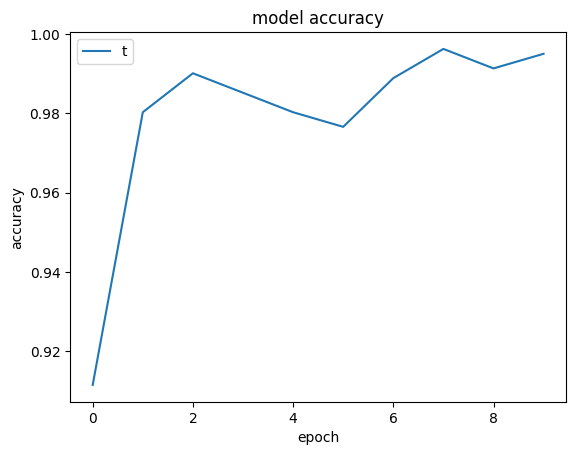

In [ ]:
# Plot curves
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend("train", loc="upper left")
    plt.show()


plot_hist(history)

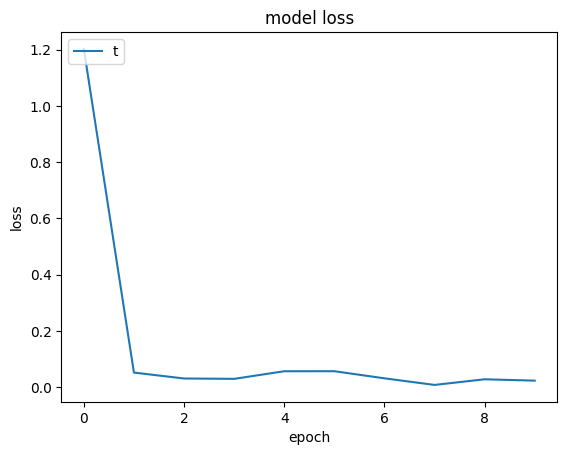

In [ ]:
# Plot curves
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend("train", loc="upper left")
    plt.show()


plot_hist(history)

In [ ]:
# Evaluate the model on the augmented validation dataset
val_loss, val_acc, val_precision, val_recall, val_f1_score = model.evaluate(validation_generator)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)
print('Val Precision:', val_precision)
print('Val Recall:', val_recall)
print('Val F1 Score:', val_f1_score)

7/7 [==============================] - 4s 587ms/step - loss: 0.0575 - accuracy: 0.9810 - precision: 0.9810 - recall: 0.9810 - f1_score: 0.9810
Val Loss: 0.05754514038562775
Val Accuracy: 0.9809523820877075
Val Precision: 0.9809523820877075
Val Recall: 0.9809523820877075
Val F1 Score: 0.9809558391571045
